In [575]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
import statsmodels.api as sm
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [576]:
training = pd.read_csv('processedTrain.csv')

In [577]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 

In [578]:

X = training.drop(['AVERAGE_SPEED_DIFF'],axis=1)
y = training['AVERAGE_SPEED_DIFF']

In [579]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2022)

In [580]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [581]:
X_res = X_train_scaled
X_test = X_test_scaled
y_res = y_train

In [582]:
sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [583]:
sme = SMOTEENN(random_state=2021,sampling_strategy='not majority')
X_res, y_res = sme.fit_resample(X_train_scaled, y_train)

In [584]:
scaler = RobustScaler()

In [585]:
#X_res = X_train
#y_res = y_train

In [586]:
#X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']])
#X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [587]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


In [588]:
classifiers = [LogisticRegression(solver='liblinear'),
    RandomForestClassifier(random_state=2021,n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=2021),
    LogisticRegression(random_state=2021,max_iter = 20000,n_jobs=-1),
    MLPClassifier(random_state=2021),
    AdaBoostClassifier(random_state=2021),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(random_state=2021),
    GaussianProcessClassifier(random_state=2021),
    XGBClassifier(random_state=2021,n_jobs=-1)]

In [589]:
'''
for i in classifiers:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('______________________________________________')
    print(i)
    print('..............................................')
    print('Train',model.score(X_train, y_train)*100)
    print('Test',model.score(X_test, y_test)*100)
'''

"\nfor i in classifiers:\n    model = i\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    print('______________________________________________')\n    print(i)\n    print('..............................................')\n    print('Train',model.score(X_train, y_train)*100)\n    print('Test',model.score(X_test, y_test)*100)\n"

In [590]:
from pycaret.classification import *

In [591]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)


In [592]:
classify = setup(data = training , target = 'AVERAGE_SPEED_DIFF',train_size=0.8,session_id=2021,normalize = True,fix_imbalance=True,fix_imbalance_method=sm)

,Description,Value
0,session_id,2021
1,Target,AVERAGE_SPEED_DIFF
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(6812, 30)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='AVERAGE_SPEED_DIFF',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dumm

In [593]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8121,0.9649,0.8114,0.8150,0.8127,0.7549,0.7553,0.7600
xgboost,Extreme Gradient Boosting,0.8106,0.9638,0.8076,0.8136,0.8112,0.7529,0.7533,1.5470
rf,Random Forest Classifier,0.8025,0.9647,0.8056,0.8078,0.8031,0.7428,0.7438,0.3110
gbc,Gradient Boosting Classifier,0.7987,0.9632,0.8028,0.8026,0.7991,0.7379,0.7385,1.7250
et,Extra Trees Classifier,0.7968,0.9628,0.7973,0.7983,0.7961,0.7346,0.7352,0.2220
lr,Logistic Regression,0.7651,0.9519,0.7729,0.7725,0.7644,0.6948,0.6964,0.4930
lda,Linear Discriminant Analysis,0.7221,0.9263,0.7349,0.7206,0.7170,0.6376,0.6392,0.1110
dt,Decision Tree Classifier,0.7201,0.8210,0.7175,0.7245,0.7210,0.6356,0.6362,0.1170
nb,Naive Bayes,0.7130,0.9200,0.7211,0.7148,0.7072,0.6256,0.6280,0.1180
svm,SVM - Linear Kernel,0.6581,0.0000,0.6605,0.6641,0.6443,0.5555,0.5617,0.1340


create_model_container: 15
master_model_container: 15
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


In [596]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8092,0.9629,0.8156,0.8114,0.8093,0.7514,0.7518
1,0.8000,0.9583,0.7936,0.8055,0.8015,0.7388,0.7394
2,0.7963,0.9607,0.7912,0.7953,0.7957,0.7332,0.7333
3,0.8165,0.9681,0.8199,0.8225,0.8175,0.7610,0.7618
4,0.7890,0.9577,0.7764,0.7949,0.7901,0.7251,0.7260
5,0.8239,0.9658,0.8180,0.8244,0.8240,0.7697,0.7698
6,0.8147,0.9657,0.8040,0.8203,0.8163,0.7582,0.7589
7,0.8128,0.9660,0.8112,0.8140,0.8131,0.7558,0.7559
8,0.8147,0.9638,0.8072,0.8186,0.8160,0.7585,0.7589
9,0.8290,0.9684,0.8389,0.8297,0.8287,0.7768,0.7772


create_model_container: 21
master_model_container: 21
display_container: 8
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)
create_model() succesfully completed......................................


In [597]:
bagged_lightgbm = ensemble_model(lightgbm, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8147,0.9634,0.8222,0.8163,0.8149,0.7585,0.7588
1,0.8000,0.9610,0.7971,0.8058,0.8017,0.7391,0.7397
2,0.7927,0.9624,0.7853,0.7919,0.7915,0.7285,0.7289
3,0.8202,0.9697,0.8277,0.8234,0.8207,0.7658,0.7661
4,0.7963,0.9627,0.7939,0.8031,0.7979,0.7351,0.7360
5,0.8055,0.9668,0.8069,0.8057,0.8052,0.7459,0.7461
6,0.8055,0.9661,0.7954,0.8088,0.8067,0.7462,0.7465
7,0.8257,0.9671,0.8284,0.8296,0.8265,0.7730,0.7737
8,0.8275,0.9676,0.8219,0.8296,0.8282,0.7752,0.7754
9,0.8235,0.9698,0.8343,0.8258,0.8233,0.7699,0.7706


create_model_container: 22
master_model_container: 22
display_container: 9
BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=2021,
                                                reg_alpha=0.0, reg_lambda=0.0,
                                                sile

In [601]:
bagged_rf = ensemble_model(rf, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7945,0.9628,0.8149,0.8053,0.7956,0.7335,0.7358
1,0.7927,0.9602,0.7904,0.8073,0.7953,0.7305,0.7332
2,0.7963,0.9632,0.8025,0.7978,0.7960,0.7342,0.7347
3,0.8165,0.9701,0.8225,0.8232,0.8179,0.7615,0.7625
4,0.7908,0.9625,0.7927,0.7999,0.7922,0.7282,0.7298
5,0.8037,0.9657,0.8143,0.8033,0.8029,0.7440,0.7442
6,0.7890,0.9653,0.7775,0.7949,0.7910,0.7248,0.7253
7,0.7963,0.9647,0.8029,0.8010,0.7964,0.7351,0.7361
8,0.8018,0.9678,0.8074,0.8148,0.8037,0.7434,0.7457
9,0.8217,0.9688,0.8355,0.8268,0.8222,0.7679,0.7690


create_model_container: 24
master_model_container: 24
display_container: 11
BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
               

In [602]:
bagged_xgb = ensemble_model(xgboost, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8018,0.9626,0.8101,0.8040,0.8019,0.7419,0.7424
1,0.7963,0.9612,0.7900,0.8030,0.7980,0.7342,0.7350
2,0.7927,0.9625,0.7870,0.7920,0.7915,0.7285,0.7289
3,0.8147,0.9700,0.8205,0.8185,0.8151,0.7587,0.7592
4,0.7945,0.9610,0.7879,0.8017,0.7961,0.7327,0.7338
5,0.8055,0.9673,0.8049,0.8044,0.8047,0.7457,0.7458
6,0.7908,0.9658,0.7840,0.7946,0.7923,0.7272,0.7274
7,0.8202,0.9656,0.8261,0.8234,0.8207,0.7659,0.7663
8,0.8294,0.9673,0.8228,0.8312,0.8298,0.7775,0.7776
9,0.8235,0.9694,0.8337,0.8260,0.8232,0.7700,0.7707


create_model_container: 25
master_model_container: 25
display_container: 12
BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=1,
                                               colsample_bynode=1,
                                               colsample_bytree=1,
                                               enable_categorical=False,
                                               gamma=0, gpu_id=-1,
                                               importance_type=None,
                                               interaction_constraints='',
                                               learning_rate=0.300000012,
                                               max_delta_step=0, max_depth=6,
                                               min_child_weight=1, missing=nan,
                                               monotone_constraints='()',
                                               n_es

In [603]:
blender_specific = blend_models(estimator_list = [lightgbm,rf,xgboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8037,0.9652,0.8128,0.8066,0.8043,0.7442,0.7447
1,0.7945,0.9622,0.7899,0.8017,0.7960,0.7320,0.7330
2,0.8037,0.9648,0.7943,0.8034,0.8031,0.7429,0.7431
3,0.8275,0.9704,0.8306,0.8319,0.8284,0.7754,0.7759
4,0.7982,0.9611,0.7884,0.8039,0.7997,0.7371,0.7378
5,0.8128,0.9673,0.8141,0.8145,0.8133,0.7558,0.7560
6,0.8147,0.9670,0.8030,0.8182,0.8158,0.7580,0.7583
7,0.8110,0.9680,0.8054,0.8124,0.8114,0.7534,0.7535
8,0.8257,0.9680,0.8206,0.8294,0.8269,0.7730,0.7733
9,0.8235,0.9709,0.8341,0.8244,0.8230,0.7697,0.7702


create_model_container: 26
master_model_container: 26
display_container: 13
VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2021, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn'...
                            

In [599]:
#boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

In [344]:
#tuned_ada = tune_model(lightgbm)

In [345]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [600]:
#tuned_rf = tune_model(rf, n_iter=50,optimize='Accuracy')

In [604]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50,optimize='Accuracy')

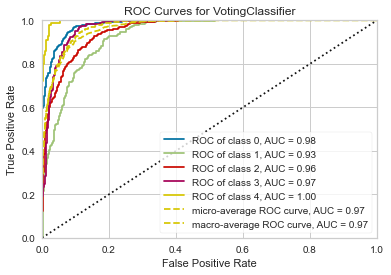

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [605]:
plot_model(blender_specific)

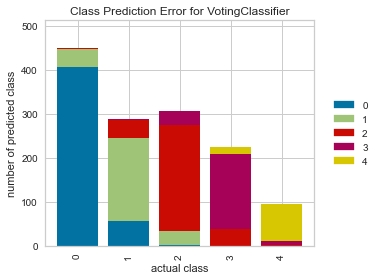

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [606]:
plot_model(blender_specific, plot = 'error')

In [607]:
plot_model(tuned_lightgbm, plot='feature')

Initializing plot_model()
plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2021, reg_alpha=0.0,
                               

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [608]:
evaluate_model(blender_specific)

Initializing evaluate_model()
evaluate_model(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2021, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn'...
                                            min_c

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_rf);

Initializing predict_model()
predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8063,0.9645,0.7909,0.8118,0.8077,0.7451,0.7454


In [ ]:
final_rf = finalize_model(tuned_rf)

Initializing finalize_model()
finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_sa

In [ ]:
testing = pd.read_csv('processedTest.csv')
#testing_scaled = scaler.transform(testing)
unseen_predictions = predict_model(final_rf, data=testing)

Initializing predict_model()
predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


KeyError: "['weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos'] not in index"

In [ ]:
unseen_predictions['AVERAGE_SPEED_DIFF'] = unseen_predictions['Label']

In [ ]:
unseen_predictions.loc[unseen_predictions.AVERAGE_SPEED_DIFF == 0, 'AVERAGE_SPEED_DIFF'] = 'None'
unseen_predictions.loc[unseen_predictions.AVERAGE_SPEED_DIFF == 1, 'AVERAGE_SPEED_DIFF'] = 'Low'
unseen_predictions.loc[unseen_predictions.AVERAGE_SPEED_DIFF == 2, 'AVERAGE_SPEED_DIFF'] = 'Medium'
unseen_predictions.loc[unseen_predictions.AVERAGE_SPEED_DIFF == 3, 'AVERAGE_SPEED_DIFF'] = 'High'
unseen_predictions.loc[unseen_predictions.AVERAGE_SPEED_DIFF == 4, 'AVERAGE_SPEED_DIFF'] = 'Very_High'


In [ ]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': unseen_predictions['AVERAGE_SPEED_DIFF']}
submission = pd.DataFrame(data=final_data)

In [ ]:
submission['Speed_Diff'].value_counts()

None         483
Medium       341
Low          310
High         264
Very_High    102
Name: Speed_Diff, dtype: int64

In [ ]:
compare = pd.read_csv('sample_submission.csv')

In [ ]:
compare['Speed_Diff'].value_counts()

None         482
Medium       340
Low          313
High         268
Very_High     97
Name: Speed_Diff, dtype: int64

In [ ]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1354
False      146
dtype: int64

In [ ]:
submission.head()

,RowId,Speed_Diff
0,1,None
1,2,Medium
2,3,None
3,4,High
4,5,Low


In [ ]:
submission.to_csv('submission.csv',index=False)